In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow --quiet

In [3]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [4]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [5]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("/content/drive/MyDrive/Dataset/Gold Futures Historical Data.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

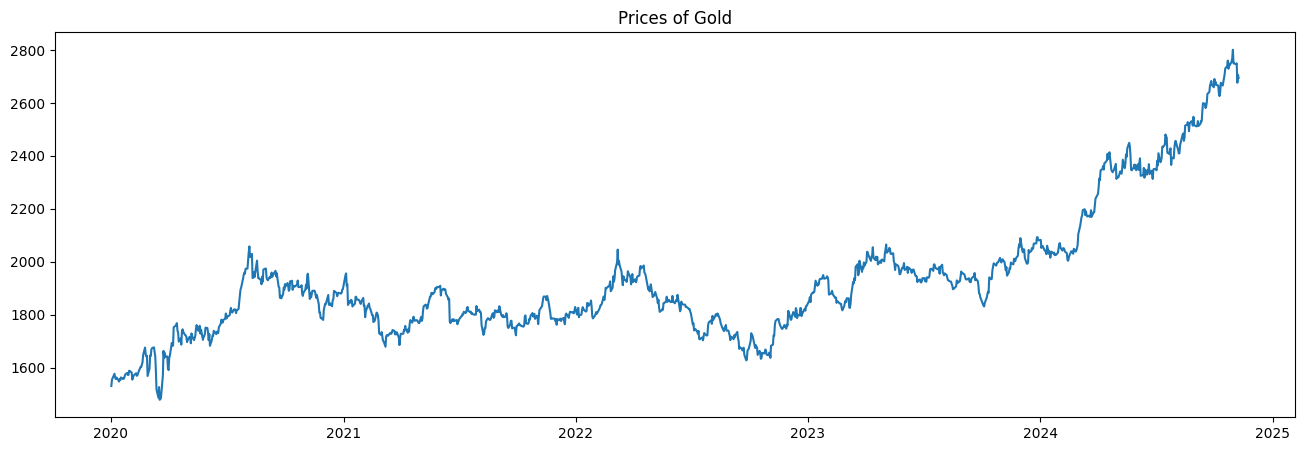

In [6]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Format column Price to float
df['Price'] = df.Price.str.replace(',','').astype(float)

# Flip the column
df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Price'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Price'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [7]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [8]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [9]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [10]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras' # Changed the file extension to .keras

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.08771, saving model to save_model_7_2_1.keras
16/16 - 8s - 502ms/step - loss: 0.0877
Epoch 2/80

Epoch 2: loss improved from 0.08771 to 0.03638, saving model to save_model_7_2_1.keras
16/16 - 3s - 209ms/step - loss: 0.0364
Epoch 3/80

Epoch 3: loss improved from 0.03638 to 0.03088, saving model to save_model_7_2_1.keras
16/16 - 4s - 233ms/step - loss: 0.0309
Epoch 4/80

Epoch 4: loss improved from 0.03088 to 0.02771, saving model to save_model_7_2_1.keras
16/16 - 3s - 159ms/step - loss: 0.0277
Epoch 5/80

Epoch 5: loss improved from 0.02771 to 0.02651, saving model to save_model_7_2_1.keras
16/16 - 3s - 159ms/step - loss: 0.0265
Epoch 6/80

Epoch 6: loss improved from 0.02651 to 0.02550, saving model to save_model_7_2_1.keras
16/16 - 3s - 209ms/step - loss: 0.0255
Epoch 7/80

Epoch 7: loss did not improve from 0.02550
16/16 - 3s - 196ms/step - loss: 0.0256
Epoch 8/80

Epoch 8: loss improved from 0.02550 to 0.02513, saving model to save_model_7_2_1.

In [11]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model_7_2_1.keras file
# Changed the filename to match the one used in the previous cell
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


In [12]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [13]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [14]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6446193431209322, 0.6546087482972605, 0.6443166338731647, 0.6309974269713938, 0.6578628727107612, 0.6595277735734826, 0.6594520962615409, 0.6555168760405627, 0.6829877402754654, 0.66989556530952, 0.7044044195550172, 0.6786741334947779, 0.681928257908279, 0.6910095353413046, 0.7230967156046617, 0.7222642651733011, 0.7285454820644768, 0.7579839564098683, 0.7520811260784015, 0.7495080974723778, 0.7059179657938548, 0.70251248675647, 0.7119721507492052, 0.7184047222642649, 0.6710307249886482, 0.6919176630846069, 0.6896473437263506, 0.7181776903284394, 0.7339942485242925, 0.7398970788557588, 0.7324807022854549, 0.7137884062358104, 0.7037233237475404, 0.7044800968669593, 0.7275616770092326, 0.7348266989556531, 0.7578326017859847, 0.7609353715756015, 0.7398970788557588, 0.7492053882246101, 0.783335855910398, 0.7860602391403055, 0.7930982291509006, 0.7906008778568183, 0.7674436204026032, 0.7894657181776901, 0.7961253216285757, 0.7945360980777962, 0.7831845012865144, 0.80846072347510

In [15]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8673812747001648], [0.8238340616226196], [0.8025915622711182], [0.7905798554420471], [0.7793832421302795], [0.7663043737411499], [0.7518998384475708], [0.7374351024627686], [0.7237142324447632], [0.7109306454658508], [0.6989350914955139], [0.6875008940696716], [0.6764529347419739], [0.6656888127326965], [0.6551557779312134], [0.6448241472244263], [0.6346727013587952], [0.6246827840805054], [0.6148382425308228], [0.6051265001296997], [0.5955398082733154], [0.5860748887062073], [0.5767321586608887], [0.5675159096717834], [0.5584322810173035], [0.5494887232780457], [0.5406936407089233], [0.5320563316345215], [0.523585855960846], [0.5152910351753235]]


In [16]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [17]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2625.55761639]
 [2568.01432903]
 [2539.94449039]
 [2524.07222098]
 [2509.27701615]
 [2491.99459946]
 [2472.96044652]
 [2453.84674439]
 [2435.71598675]
 [2418.82375492]
 [2402.9728299 ]
 [2387.86368142]
 [2373.26490797]
 [2359.04119714]
 [2345.12284496]
 [2331.47062814]
 [2318.05650758]
 [2304.85583088]
 [2291.84725368]
 [2279.01415727]
 [2266.34630265]
 [2253.83935794]
 [2241.49387445]
 [2229.31552304]
 [2217.31241614]
 [2205.49439894]
 [2193.87257683]
 [2182.45923662]
 [2171.26635007]
 [2160.30557388]]


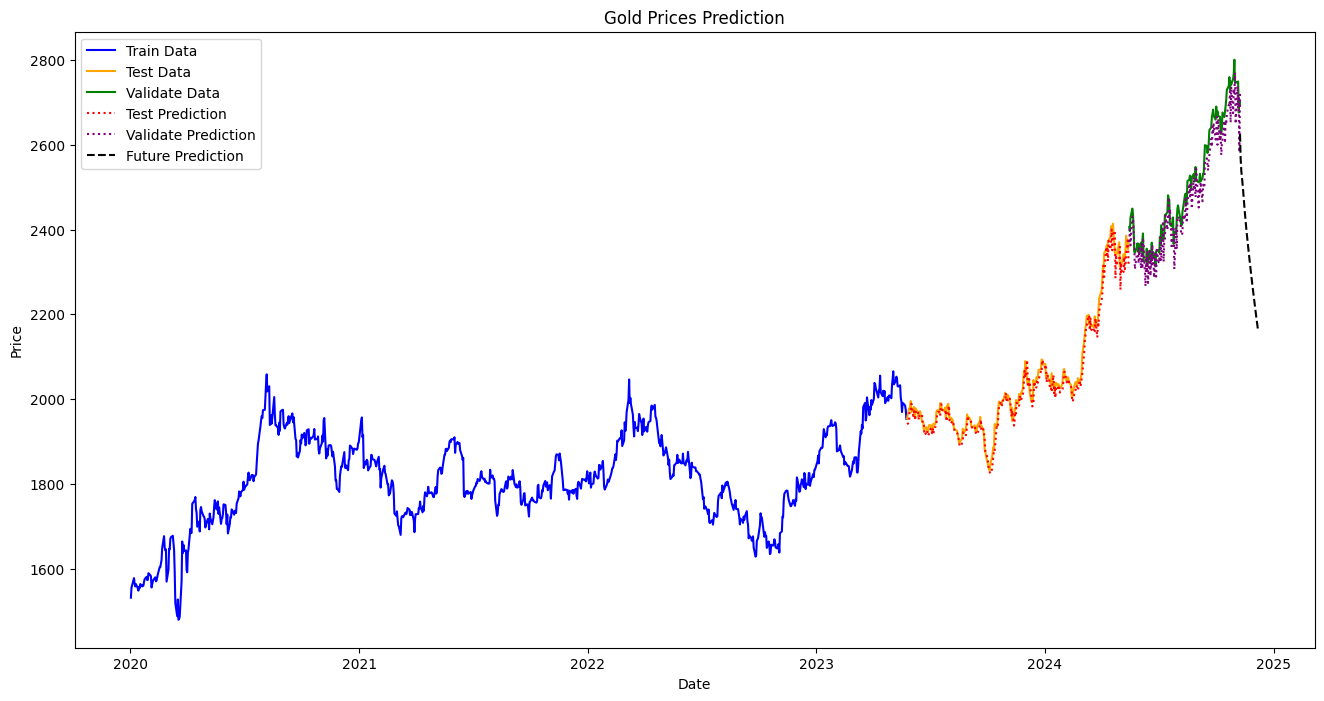

In [18]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Price'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Price'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Price'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

In [19]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  15.54678857421875
MAPE:  0.745288042493813
RMSE:  20.62891317280776

** Validate **
MAE:  37.61199134165849
MAPE:  1.4906340196048338
RMSE:  45.5686800401124


# Split dataset (6-3-1)

---



In [22]:
# Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [23]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [24]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [25]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
# Change the file extension to '.keras'
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.08833, saving model to save_model_6_3_1.keras
14/14 - 6s - 460ms/step - loss: 0.0883
Epoch 2/80

Epoch 2: loss improved from 0.08833 to 0.03718, saving model to save_model_6_3_1.keras
14/14 - 3s - 181ms/step - loss: 0.0372
Epoch 3/80

Epoch 3: loss improved from 0.03718 to 0.03257, saving model to save_model_6_3_1.keras
14/14 - 3s - 180ms/step - loss: 0.0326
Epoch 4/80

Epoch 4: loss improved from 0.03257 to 0.03066, saving model to save_model_6_3_1.keras
14/14 - 2s - 153ms/step - loss: 0.0307
Epoch 5/80

Epoch 5: loss improved from 0.03066 to 0.02627, saving model to save_model_6_3_1.keras
14/14 - 3s - 208ms/step - loss: 0.0263
Epoch 6/80

Epoch 6: loss improved from 0.02627 to 0.02555, saving model to save_model_6_3_1.keras
14/14 - 4s - 282ms/step - loss: 0.0256
Epoch 7/80

Epoch 7: loss did not improve from 0.02555
14/14 - 2s - 126ms/step - loss: 0.0280
Epoch 8/80

Epoch 8: loss did not improve from 0.02555
14/14 - 2s - 126ms/step - loss: 0.0261

In [26]:
# Load the best model from the save_model_6_3_1.keras file
# Changed the filename to match the one used in ModelCheckpoint
final_model = load_model('save_model_6_3_1.keras')

# ... rest of the code ...

In [27]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [28]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [29]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6446193431209322, 0.6546087482972605, 0.6443166338731647, 0.6309974269713938, 0.6578628727107612, 0.6595277735734826, 0.6594520962615409, 0.6555168760405627, 0.6829877402754654, 0.66989556530952, 0.7044044195550172, 0.6786741334947779, 0.681928257908279, 0.6910095353413046, 0.7230967156046617, 0.7222642651733011, 0.7285454820644768, 0.7579839564098683, 0.7520811260784015, 0.7495080974723778, 0.7059179657938548, 0.70251248675647, 0.7119721507492052, 0.7184047222642649, 0.6710307249886482, 0.6919176630846069, 0.6896473437263506, 0.7181776903284394, 0.7339942485242925, 0.7398970788557588, 0.7324807022854549, 0.7137884062358104, 0.7037233237475404, 0.7044800968669593, 0.7275616770092326, 0.7348266989556531, 0.7578326017859847, 0.7609353715756015, 0.7398970788557588, 0.7492053882246101, 0.783335855910398, 0.7860602391403055, 0.7930982291509006, 0.7906008778568183, 0.7674436204026032, 0.7894657181776901, 0.7961253216285757, 0.7945360980777962, 0.7831845012865144, 0.80846072347510

In [30]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.888954758644104], [0.8346644639968872], [0.7813548445701599], [0.7576124668121338], [0.7637732625007629], [0.7807031869888306], [0.7848439812660217], [0.7641237378120422], [0.7253293991088867], [0.6881703734397888], [0.6695166230201721], [0.6719964146614075], [0.685549795627594], [0.696151077747345], [0.694096028804779], [0.6787176728248596], [0.6576559543609619], [0.640907883644104], [0.6340763568878174], [0.6358886361122131], [0.6404865980148315], [0.6415247917175293], [0.6355398297309875], [0.623286247253418], [0.6086033582687378], [0.5956752300262451], [0.5866143107414246], [0.5808326601982117], [0.5760849714279175], [0.5700889825820923]]


In [31]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2654.06481807]
 [2582.32562273]
 [2511.88229162]
 [2480.50911365]
 [2488.64998907]
 [2511.02119129]
 [2516.49283684]
 [2489.11310714]
 [2437.85026798]
 [2388.74833146]
 [2364.09926566]
 [2367.37606233]
 [2385.28549994]
 [2399.29403414]
 [2396.57849246]
 [2376.25753287]
 [2348.42657809]
 [2326.29567745]
 [2317.26849799]
 [2319.66324376]
 [2325.73899062]
 [2327.11085978]
 [2319.20233101]
 [2303.01044712]
 [2283.60847762]
 [2266.52524896]
 [2254.55215021]
 [2246.91227719]
 [2240.63868124]
 [2232.71558158]]


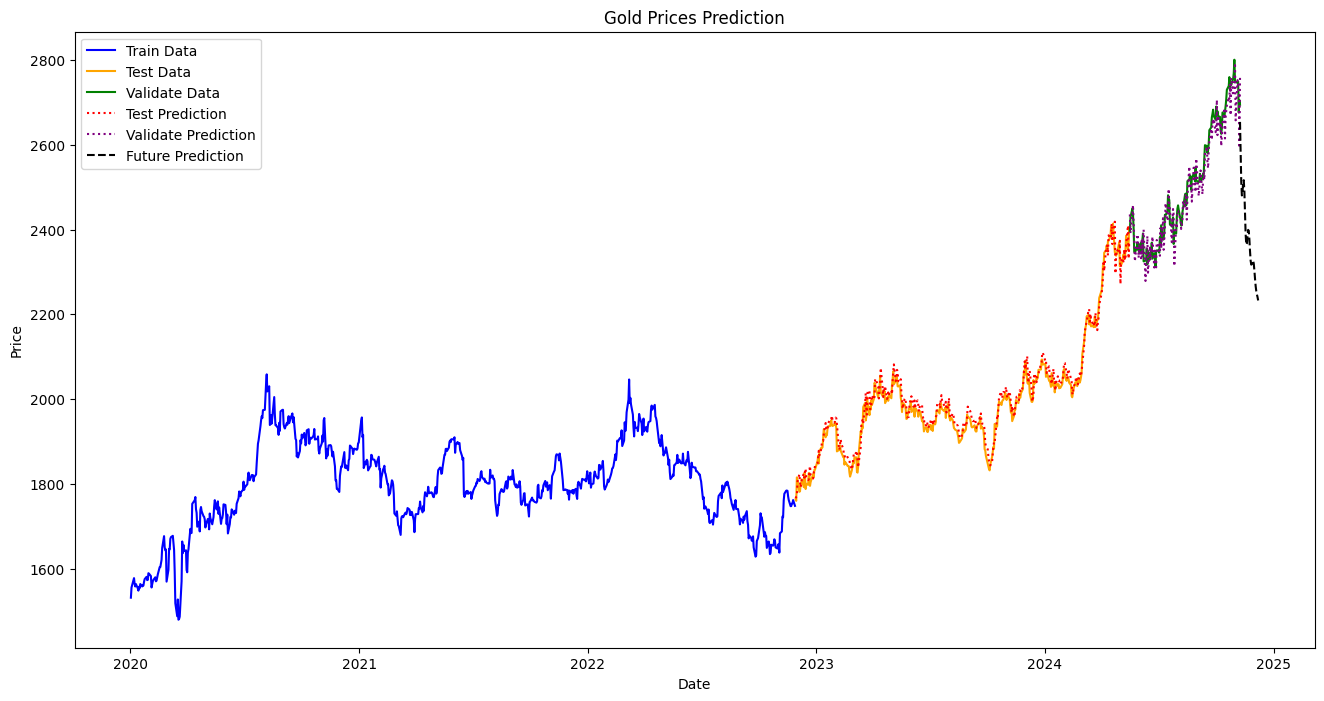

In [32]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Price'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Price'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Price'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

In [33]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  16.57590812520778
MAPE:  0.8271685209376569
RMSE:  21.215525500604862

** Validate **
MAE:  29.31114443824407
MAPE:  1.166287768745188
RMSE:  35.867234478063736


# Split dataset (5-3-2)

---



In [34]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [35]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [36]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [37]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
# Change the file extension to .keras
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.08673, saving model to save_model_5_3_2.keras
11/11 - 7s - 643ms/step - loss: 0.0867
Epoch 2/80

Epoch 2: loss improved from 0.08673 to 0.03319, saving model to save_model_5_3_2.keras
11/11 - 2s - 221ms/step - loss: 0.0332
Epoch 3/80

Epoch 3: loss improved from 0.03319 to 0.02890, saving model to save_model_5_3_2.keras
11/11 - 3s - 234ms/step - loss: 0.0289
Epoch 4/80

Epoch 4: loss improved from 0.02890 to 0.02819, saving model to save_model_5_3_2.keras
11/11 - 2s - 176ms/step - loss: 0.0282
Epoch 5/80

Epoch 5: loss improved from 0.02819 to 0.02675, saving model to save_model_5_3_2.keras
11/11 - 3s - 269ms/step - loss: 0.0268
Epoch 6/80

Epoch 6: loss improved from 0.02675 to 0.02561, saving model to save_model_5_3_2.keras
11/11 - 2s - 146ms/step - loss: 0.0256
Epoch 7/80

Epoch 7: loss did not improve from 0.02561
11/11 - 1s - 126ms/step - loss: 0.0259
Epoch 8/80

Epoch 8: loss improved from 0.02561 to 0.02457, saving model to save_model_5_3_2.

In [38]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model_5_3_2.keras file
# Changed the filename to match the one used in ModelCheckpoint
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step


In [39]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [40]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [41]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6446193431209322, 0.6546087482972605, 0.6443166338731647, 0.6309974269713938, 0.6578628727107612, 0.6595277735734826, 0.6594520962615409, 0.6555168760405627, 0.6829877402754654, 0.66989556530952, 0.7044044195550172, 0.6786741334947779, 0.681928257908279, 0.6910095353413046, 0.7230967156046617, 0.7222642651733011, 0.7285454820644768, 0.7579839564098683, 0.7520811260784015, 0.7495080974723778, 0.7059179657938548, 0.70251248675647, 0.7119721507492052, 0.7184047222642649, 0.6710307249886482, 0.6919176630846069, 0.6896473437263506, 0.7181776903284394, 0.7339942485242925, 0.7398970788557588, 0.7324807022854549, 0.7137884062358104, 0.7037233237475404, 0.7044800968669593, 0.7275616770092326, 0.7348266989556531, 0.7578326017859847, 0.7609353715756015, 0.7398970788557588, 0.7492053882246101, 0.783335855910398, 0.7860602391403055, 0.7930982291509006, 0.7906008778568183, 0.7674436204026032, 0.7894657181776901, 0.7961253216285757, 0.7945360980777962, 0.7831845012865144, 0.80846072347510

In [42]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.887233316898346], [0.8511202335357666], [0.8305646181106567], [0.8255038261413574], [0.8255346417427063], [0.8221132755279541], [0.8137951493263245], [0.804049015045166], [0.7965624928474426], [0.792383074760437], [0.7900937795639038], [0.7876137495040894], [0.7837100028991699], [0.7783454060554504], [0.7721347212791443], [0.7656363844871521], [0.7590084075927734], [0.7520973086357117], [0.7447149753570557], [0.7368396520614624], [0.7286344766616821], [0.7203440070152283], [0.7121779322624207], [0.7042580842971802], [0.6966309547424316], [0.689308762550354], [0.6823006868362427], [0.6756196618080139], [0.6692734956741333], [0.6632530689239502]]


In [43]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2651.79010495]
 [2604.07027659]
 [2576.90808637]
 [2570.22075586]
 [2570.2614756 ]
 [2565.74048228]
 [2554.74891032]
 [2541.87036848]
 [2531.97767805]
 [2526.45499499]
 [2523.42992032]
 [2520.15280859]
 [2514.99439783]
 [2507.90561956]
 [2499.6988207 ]
 [2491.11191846]
 [2482.35370979]
 [2473.22138363]
 [2463.46636844]
 [2453.05991623]
 [2442.21759746]
 [2431.26257087]
 [2420.47191969]
 [2410.00663259]
 [2399.9281436 ]
 [2390.25259883]
 [2380.99212759]
 [2372.16382111]
 [2363.77799718]
 [2355.82260528]]


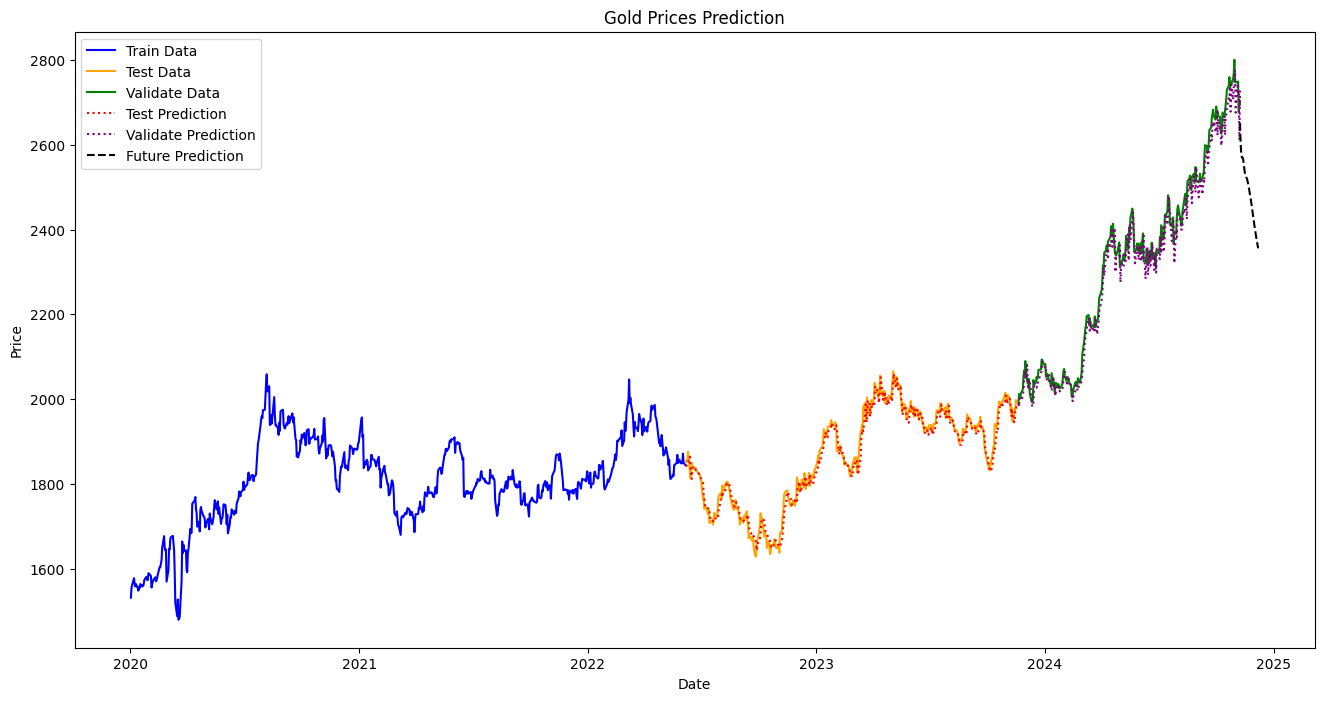

In [44]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Price'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Price'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Price'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

In [45]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.834843477289729
MAPE:  0.7433484589536332
RMSE:  18.176251461755623

** Validate **
MAE:  23.78860437157621
MAPE:  1.0020159706745504
RMSE:  29.747847480206893
